# WARP-V: Open-Source CPU Generator

<a href="https://colab.research.google.com/github/ALI11-2000/sscs-ose-code-a-chip.github.io/blob/main/Notebooks/warpv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
SPDX-License-Identifier: Apache-2.0
```


|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Steeve Hoover|Redwood EDA|Yes|No|
|Ali Imran <br /> Email ID: ali1120001@outlook.com|University of Engineering and Technology,Lahore|No|No|

Welcome!
This notebook serves as an introduction to WARP-V which is an open-source CPU generator written in TL-Verilog provided by Redwood EDA. It provides options for reconfigurable pipeline and also provides support for RISC-V and MIPS ISA. In this notebook, we are going to utilize different tools provided by the Redwood EDA to generate a simple RISC-V based core and then we will use the OpenLane flow to generate its ASIC. 

## Generating Core Configurations

First, we are going to go to generate the configuration for our core using the online WARP-V generator. For this purpose, visit https://warp-v.org/ . On the webpage you will see the following configuration form.

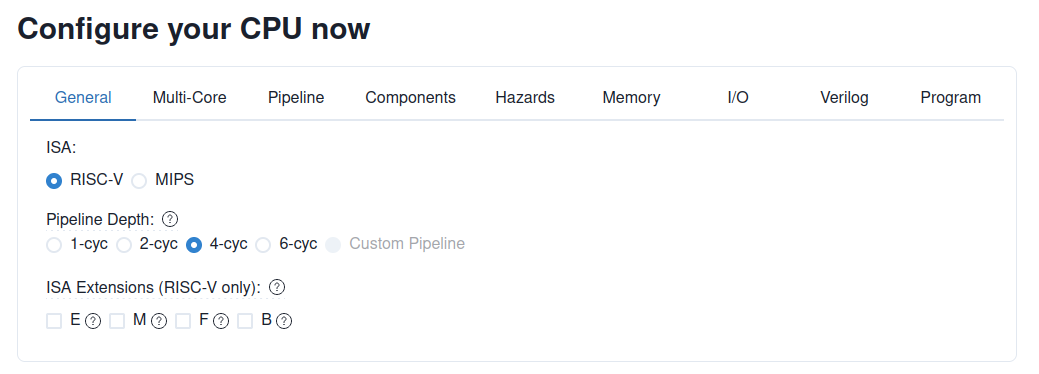


Once you have selected the configuration. Scroll down the webpage to the Core Details section. There the core configuration has been generated in TL-Verilog like this.


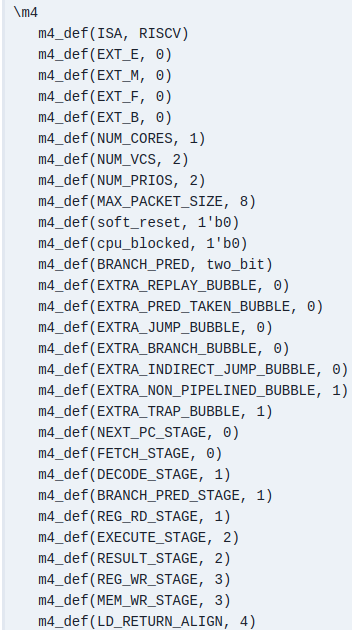

Copy the configurations generated in the previous section to next cell. Once the configuration has been copied execute the cell so that the core design file can be created.

## Creating Design File

In [ ]:
%%writefile warpv_core.tlv
\m4_TLV_version 1d --bestsv --noline: tl-x.org
\SV
   /*
   Copyright 2022 Redwood EDA
   
   Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
   
   The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
   
   THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
   */
\m4
   m4_def(IMEM_STYLE, EXTERN)
   m4_def(DMEM_STYLE, EXTERN)

   // Copy your core configurations here
   
   m4_def(ISA, RISCV)
   m4_def(EXT_E, 0)
   m4_def(EXT_M, 0)
   m4_def(EXT_F, 0)
   m4_def(EXT_B, 0)
   m4_def(NUM_CORES, 1)
   m4_def(NUM_VCS, 2)
   m4_def(NUM_PRIOS, 2)
   m4_def(MAX_PACKET_SIZE, 8)
   m4_def(soft_reset, 1'b0)
   m4_def(cpu_blocked, 1'b0)
   m4_def(BRANCH_PRED, two_bit)
   m4_def(EXTRA_REPLAY_BUBBLE, 0)
   m4_def(EXTRA_PRED_TAKEN_BUBBLE, 0)
   m4_def(EXTRA_JUMP_BUBBLE, 0)
   m4_def(EXTRA_BRANCH_BUBBLE, 0)
   m4_def(EXTRA_INDIRECT_JUMP_BUBBLE, 0)
   m4_def(EXTRA_NON_PIPELINED_BUBBLE, 1)
   m4_def(EXTRA_TRAP_BUBBLE, 1)
   m4_def(NEXT_PC_STAGE, 0)
   m4_def(FETCH_STAGE, 0)
   m4_def(DECODE_STAGE, 1)
   m4_def(BRANCH_PRED_STAGE, 1)
   m4_def(REG_RD_STAGE, 1)
   m4_def(EXECUTE_STAGE, 2)
   m4_def(RESULT_STAGE, 2)
   m4_def(REG_WR_STAGE, 3)
   m4_def(MEM_WR_STAGE, 3)
   m4_def(LD_RETURN_ALIGN, 4)
\SV
   // Include WARP-V.
   
   m4_include_lib(['https://raw.githubusercontent.com/ALI11-2000/warp-v/1d9674ce50e970dbbe0d01d29e10fe2cba86c7fe/warp-v.tlv'])
                   
   m4_ifelse(M4_MAKERCHIP,1,['
   m4_sv_get_url(['https://raw.githubusercontent.com/ALI11-2000/mpw-waprv/main/verilog/rtl/sky130_sram_1kbyte_1rw1r_32x256_8.v'])
   m4_sv_get_url(['https://raw.githubusercontent.com/ALI11-2000/mpw-waprv/699c8bfee4668d8ef603e29822cd014138ace14c/verilog/rtl/imem.hex'])
   
	m4_makerchip_module
   	logic [31:0] dmem_addra;
      logic [31:0] dmem_addrb;
      logic [31:0] dmem_dina ;
      logic [31:0] dmem_dinb ;
      logic [3:0]  dmem_wea  ;
      logic        dmem_wea0 ;
      logic [3:0]  dmem_web  ;
      logic        dmem_ena  ;
      logic        dmem_enb  ;
      logic [31:0] dmem_doutb;
      logic [31:0] imem_addr ;
      logic [31:0] imem_data ;
      logic        clk_h;
                  
      warpv_core dut( dmem_addra,
                      dmem_addrb,
                      dmem_dina ,
                      dmem_dinb ,
                      dmem_wea  ,
                      dmem_wea0 ,
                      dmem_web  ,
                      dmem_ena  ,
                      dmem_enb  ,
                      dmem_doutb,
                      imem_addr ,
                      imem_data ,
                      clk, reset);
                  
     sky130_sram_1kbyte_1rw1r_32x256_8 imem(
        .clk0(clk),.csb0(1'b1),.web0('0),.wmask0('0),.addr0('0),.din0('0),.dout0(),
        .clk1(clk),.csb1(1'b0),.addr1(imem_addr),.dout1(imem_data)
      );
     
     sky130_sram_1kbyte_1rw1r_32x256_8 dmem(
        .clk0(clk),.csb0(dmem_ena),.web0(dmem_wea0),.wmask0(dmem_wea),
        .addr0(dmem_addra),.din0(dmem_dina), .dout0(),
        .clk1(clk),.csb1(dmem_enb),.addr1(dmem_addrb),.dout1(dmem_doutb)
    );
     initial
   	begin
      clk_h = 1;
   	$display("Loading RAM from %0s", "./sv_url_inc/imem.hex");
   	$readmemh("./sv_url_inc/imem.hex", imem.mem);
   	end
                  
     always_ff@(posedge clk) begin
         clk_h = !clk_h;
      end
           
   endmodule
   '])
                   
	module warpv_core( output [31:0] dmem_addra,
                      output [31:0] dmem_addrb,
                      output [31:0] dmem_dina ,
                      output [31:0] dmem_dinb ,
                      output [3:0]  dmem_wea  ,
                      output        dmem_wea0 ,
                      output [3:0]  dmem_web  ,
                      output        dmem_ena  ,
                      output        dmem_enb  ,
                      input  [31:0] dmem_doutb,
                      output [31:0] imem_addr ,
                      input  [31:0] imem_data,
                      input         clk, reset);

\TLV
   m4+cpu(/top)
   m4+cpu_viz(|fetch, "#7AD7F0")
\SV
   endmodule

## Using Makerchip IDE
Now we will use the Makerchip IDE to simulate and debug our core. For this purpose, copy the code in the previous cell excluding the first line. Then open the Makerchip IDE on your browser by visiting https://app.makerchip.com/sandbox#. Once there, copy your code there and then simulate it using Ctrl-Enter.

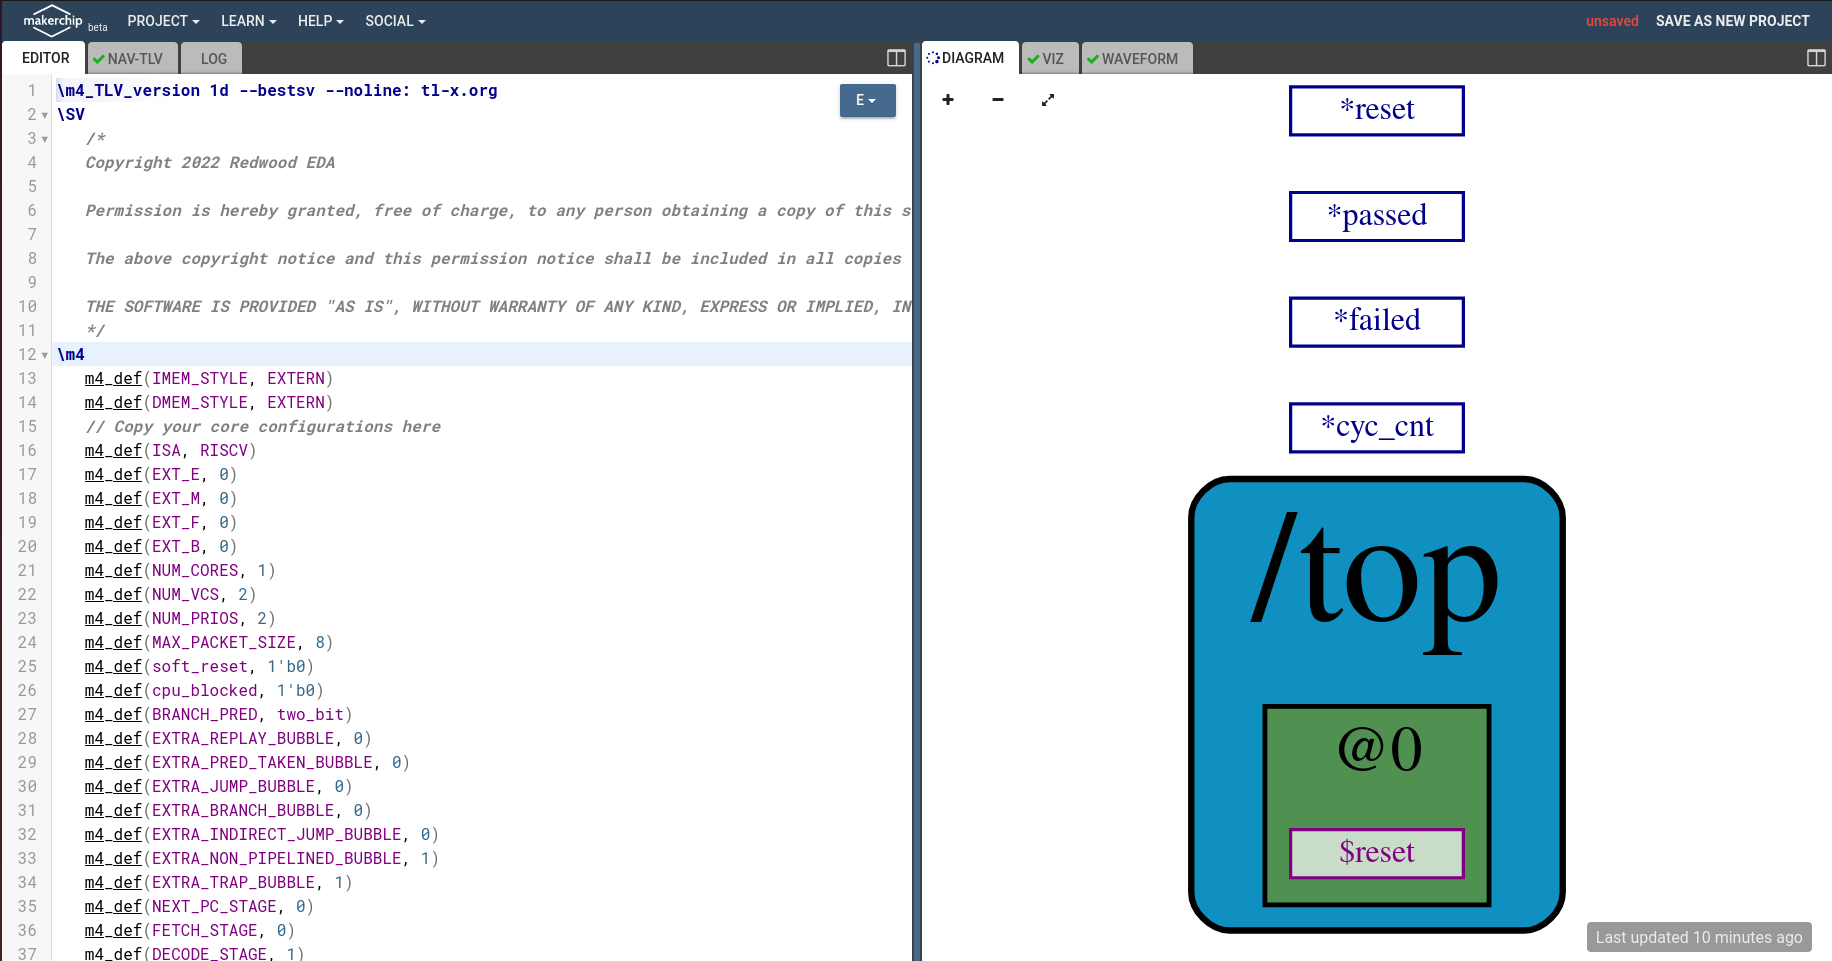

Now go to the VIZ tab. There you will see that you can visualize the core which is a powerful aspect of the IDE. You can see which instruction is being executed on each cycle.

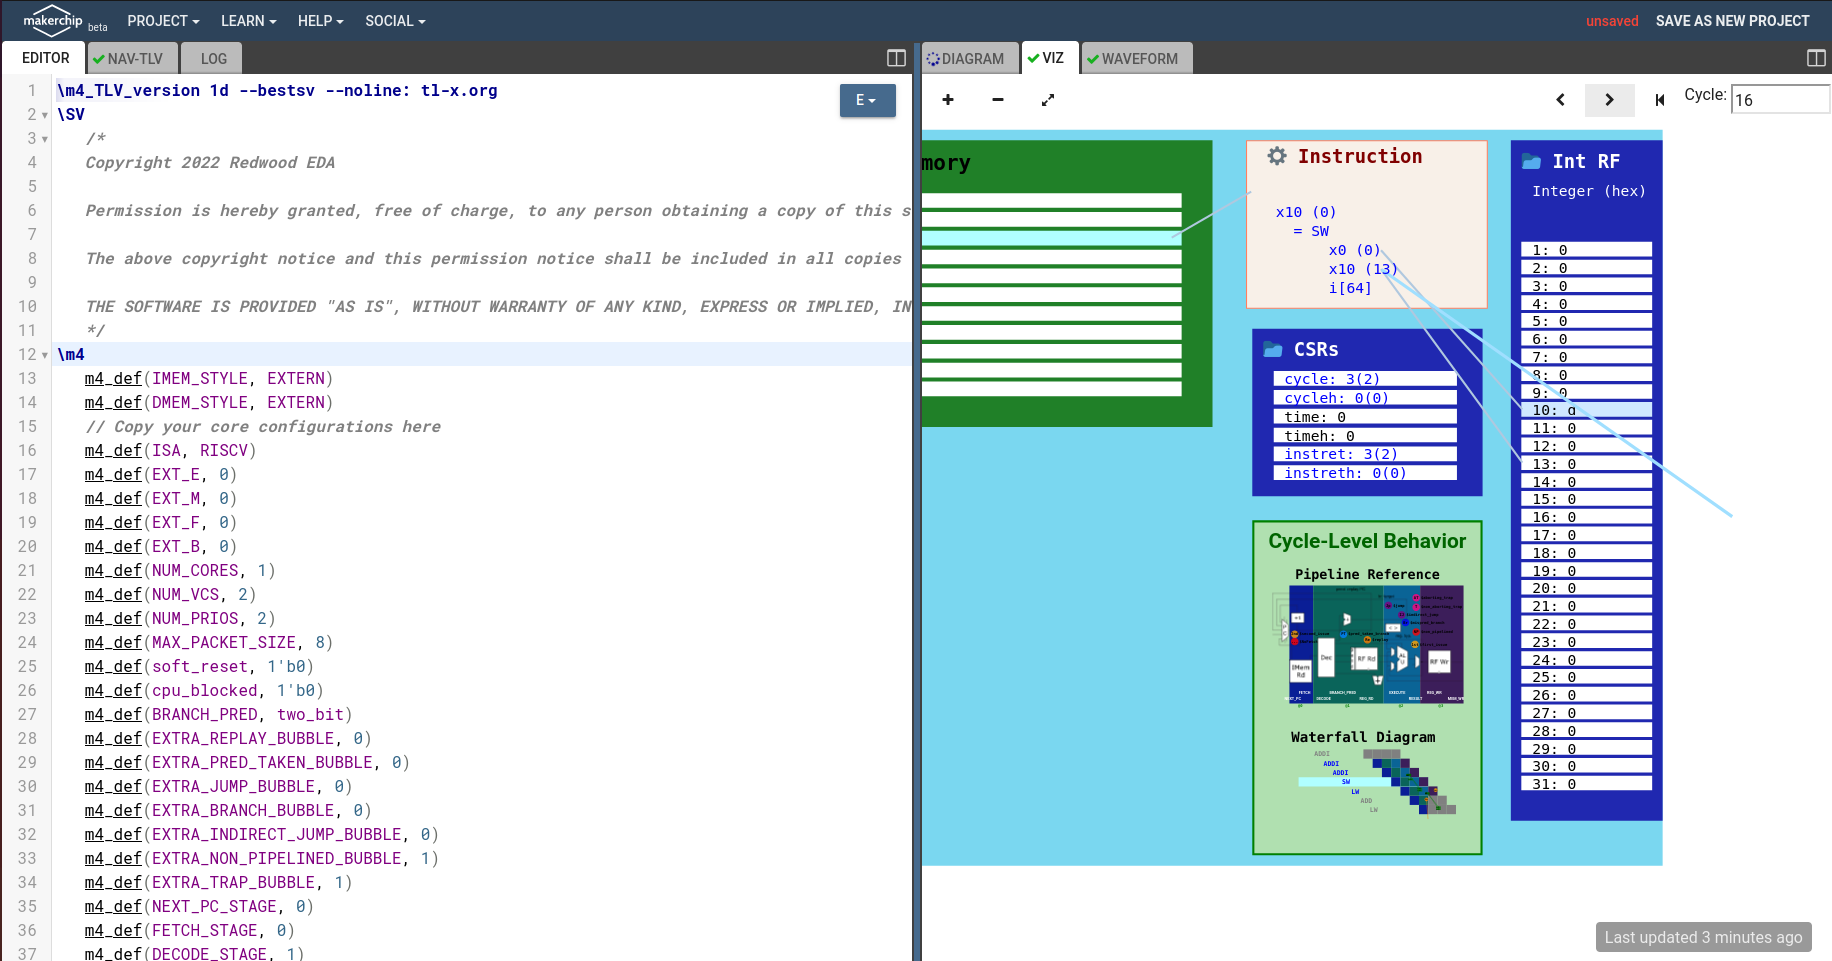

Once you have simulated the design. Update the previous cell incase of any update in the design.

## WARP-V with OpenLane
Now we will run the WARP-V design through the OpenLane flow targeting the Skywater PDK.

### Setting up OpenLane

In [ ]:
import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        open_pdks.sky130a \
                        magic \
                        openroad \
                        netgen \
                        yosys 
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        tcllib gdstk pyyaml click
!pip install sandpiper-saas
!git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane

### Generating Verilog Design with Sandpiper-Saas
Now we will use the sandpiper-saas tool provided by Redwood EDA with to generate the Verilog design from the TL-Verilog source generated above.

In [ ]:
!sandpiper-saas -o warpv_core.v -i warpv_core.tlv --sv_url_inc --inlineGen --noline --hdl verilog

### Writing the OpenLane Configuration

In [ ]:
%%writefile config.tcl
set ::env(DESIGN_NAME) inverter

set script_dir [file dirname [file normalize [info script]]]
set ::env(VERILOG_FILES) "$script_dir/inverter.v"

set ::env(CLOCK_TREE_SYNTH) 0
set ::env(CLOCK_PORT) "clk"

set ::env(PL_RANDOM_GLB_PLACEMENT) 1

set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 900 600"
set ::env(PL_TARGET_DENSITY) 0.25


set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

set ::env(DIODE_INSERTION_STRATEGY) 3

# disable version checks because we use conda packaged versions
set ::env(TEST_MISMATCHES) none
# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

### Running OpenLane Flow

In [ ]:
import os
import pathlib
OPENLANE_ROOT=str(pathlib.Path('OpenLane').resolve())
PATH=os.environ['PATH']
%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
%env OPENLANE_ROOT={OPENLANE_ROOT}
%env PATH={PATH}:{OPENLANE_ROOT}:{OPENLANE_ROOT}/scripts
%env OPENLANE_LOCAL_INSTALL=1
!flow.tcl -design .

### Display Layout

In [ ]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('warp-v.svg')
IPython.display.SVG('warp-v.svg')

### Flow Report

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()